### Цели и задачи проекта

- **Цель проекта:** создать "карту" заведений общественного питания в г. Москва, чтобы определить наиболее перспективный для инвестирования *формат, меню, график работы и пр. особенности работы заведения*

### Описание данных

    Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
    1. name — название заведения;
    2. address — адрес заведения;
    3. district — административный район, в котором находится заведение, например Центральный административный округ;
    4. category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    5. hours — информация о днях и часах работы;
    6. rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    7. chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
    8. seats — количество посадочных мест.
    
    Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
    1. price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
    2. avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
        А) «Средний счёт: 1000–1500 ₽»;
        Б) «Цена чашки капучино: 130–220 ₽»;
        В) «Цена бокала пива: 400–600 ₽».
    3. middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
        А) Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Б) Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        В) Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
    4. middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
        А) Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Б) Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        В) Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---

## Загрузка данных и знакомство с ними

- Загружаем данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik==0.11.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
from phik import phik_matrix

In [4]:
df_cafe = pd.read_csv('/datasets/rest_info.csv')
df_price = pd.read_csv('/datasets/rest_price.csv')

- Знакомимся с данными массива df_cafe

In [5]:
print(df_cafe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
None


In [6]:
df_cafe.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


#### Общая информация о массиве df_cafe

1. В массиве собрана информация о **8406 заведений**
2. В массиве df_price для столбцов *id*, *name*, *category*, *address*, *district*, *hours* тип данных задан **object**, для  столбцов *rating*, *seats* данные в формате **float64**, а для столбца *chain* в формате **int64**
3. В столбце *hours* представлено **636** пропуска, а в столбце *seats* гораздо большее количество пропусков - **3611**

--- 
- Пропуски в столбце *hours* могут быть связаны с тем, что кафе в настоящий момент закрыто (например, по причине временного ремонта или прекратило свою деятельность)

- Пропуски в столбце *seats* могут быть связаны с тем, что точка просто не имеет сидячих мест и работает как точка "кофе с собой" или (что наиболее вероятно) при переносе данных произошёл технический сбой и не все данные получилось корректно перенести

In [7]:
print(df_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB
None


In [8]:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


#### Общая информация о массиве df_price

1. В массиве собрана информация о **4058 заведениях**
2. В массиве df_price для столбцов *id*, *price*, *avg_bill* тип данных задан **object**, для остальных столбцов данные в формате **float64**: *middle_avg_bill*, *middle_coffee_cup*
3. В четырёх столбцах представлено большое количество пропусков: price (**743**), avg_bill (**242**), middle_avg_bill (**911**), middle_coffee_cup (**3523**)

---
- Пропуски данных в таких столбцах как *price*, *avg_bill* и *middle_avg_bill* могут быть связаны с тем, что эти данные либо не были предоставлены, либо при их получении возникла техническая ошибка и многие ячейки были заполнены некорректно

- В столбце *middle_coffee_cup* пропуски могут быть связаны с тем, что данные заведения просто не занимаются продажей кофе или данная позиция является вторичной и не основной в данном заведении (рестораны, пабы, бары и пр. заведения) 

---

### Промежуточный вывод

- **Объём данных и количество пропусков:** 
- **Описание данных и корректность огравления:** 

### Подготовка единого датафрейма

In [9]:
# Объединение датафреймов будем осуществлять посредством столбца id
# Будем использовать left join, чтобы перенести все заведения из df_cafe
df = pd.merge(df_cafe, df_price, on = 'id', how = 'left')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## Предобработка данных

Подготовка данных к исследовательскому анализу:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


### Анализ  пропусков

In [11]:
# Абсолютное количество пропусков в каждом столбце
df.isna().sum().sort_values(ascending = False)

# Относительное количесвто пропусков в каждом столбце
df.isna().sum().sort_values(ascending = False) / len(df) * 100

middle_coffee_cup    93.635498
middle_avg_bill      62.538663
price                60.563883
avg_bill             54.603854
seats                42.957411
hours                 6.376398
id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
rating                0.000000
chain                 0.000000
dtype: float64

- Пропуска данных наблюдаются в столбцах:
    - Пропуски в таких столбцах как *avg_price, middle_coffee_cup, middle_avg_bill, price* являются данными которые, скорее всего, были получени при помощи Яндекс.Карт, на которых многие заведения имеют недостаточное количество отзывов или данных внесённых хозяевами заведения (**MAR**); 
    - *hours* были "подтянуты", скорее всего, их Яндекс.Бизнес и в них могут встречаться пропуски в первую очередь из-за того, что вознила ошибка при переносе данных (*относится к hours*);
    - *seats* тоже были предоставлены Яндекс.Бизнесом и в них могли встретиться пропуски в связи по следующим причинам:
        1. Для заведения неактуальна данная информация (бар, паб и пр.)
        2. Компания не посчитала нужным предоставлять данную информацию

### Анализ дубликатов

In [12]:
# Нормализация значений в столбце с названием заведения

# Приводим всё к нижнему регистру
df['name'] = df['name'].str.lower()

# Выводим результат
df['name']

0                     wowфли
1             четыре комнаты
2                      хазри
3       dormouse coffee shop
4                  иль марко
                ...         
8401              суши мания
8402               миславнес
8403                 самовар
8404            чайхана sabr
8405              kebab time
Name: name, Length: 8406, dtype: object

In [13]:
# Проверка на явные дубликаты
duplicates = df.duplicated()

print('Количество явных дубликатов:')
print(duplicates.sum())

print('\n Дубликаты:')
duplicates

Количество явных дубликатов:
0

 Дубликаты:


0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403    False
8404    False
8405    False
Length: 8406, dtype: bool

- Изучим данные о том, какие значения есть в категориалных переменных:

In [14]:
# Catgory 
print('Уникальные значения столбца catagery:')
print(list(df['category'].unique()))

# District
print('\nУникальные значения столбца district:')
print(list(df['district'].unique()))

Уникальные значения столбца catagery:
['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']

Уникальные значения столбца district:
['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']


- Подсчёт неявных дубликатов

In [15]:
# Посчитаем колчиество неявных дуюликатов
df.duplicated(subset = ['name', 'address']).sum()

3

In [16]:
# Фильтрация дубликатов (все вхождения)
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]

# Сортировка для группировки одинаковых записей
duplicates.sort_values(by=['name', 'address'])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


- Как можно видеть, в рассматриваемых данных присутствует три неявных дубликата. Заведения имеюют одинаковые названия за исклоючением id и отдельных характеристик: расписание, категория заведения и т.п. Это может быть связано с тем, что данное заведение второй делало **повторную регистрацию в системе из-за чего ему был присвоен второй id**, а повторная регистрация могла быть связана с: (1) **изменением категории заведения** или (2) **изменением расписания раброты заведения**.

In [17]:
# Избавимся от неявных дубликатов
df = df.drop_duplicates(subset=['name', 'address'])

- Для дальнейшей работы был создан столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [18]:
# Создаём новый столбец
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'

In [19]:
# Проверяем, как заполнился данный столбец
df[['id', 'hours', 'is_24_7']]

,id,hours,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,"ежедневно, 10:00–22:00",False
1,045780ada3474c57a2112e505d74b633,"ежедневно, 10:00–22:00",False
2,1070b6b59144425896c65889347fcff6,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,03ac7cd772104f65b58b349dc59f03ee,"ежедневно, 09:00–22:00",False
4,a163aada139c4c7f87b0b1c0b466a50f,"ежедневно, 10:00–22:00",False
...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,"ежедневно, 09:00–02:00",False
8402,ee6bb7c3650e47bd8186fca08eda1091,"ежедневно, 08:00–22:00",False
8403,62e8c64d4c89467aba608e39ef87616b,"ежедневно, круглосуточно",True
8404,06a0db5ecd4842d48cd6350aa923e297,"ежедневно, круглосуточно",True


In [20]:
daily = df['is_24_7'].sum()
print(f'Количество круглосуточно работающих заведений: {daily}')
daily_prop = round((df['is_24_7'].sum() / len(df)) * 100, 2)
print(f'Доля круглосуточно работающих заведений: {daily_prop}%')

Количество круглосуточно работающих заведений: 730
Доля круглосуточно работающих заведений: 8.69%


---

### Промежуточный вывод

- **В ходе предобработки данных:**
1. Объединены массивы данных с общей информацией о заведениях и ценах в заведениях общественного питания;
2. Скорректированы типы данных для упрощения дальнейшей работы с данными;
3. Удаление неявных дубликатов, вызванных повторной регистрацией заведения;
4. Создание вспомогательной бинарной переменной 'is_24_7', отражающей график работы заведений общественного питания (круглосуточно / некруглосуточно) и посчитана доля круглосуточных организаций. 

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [21]:
# Catgory 
print('Уникальные значения столбца catagery:')
print(list(df['category'].unique()))

Уникальные значения столбца catagery:
['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']


In [22]:
# Таблица с количеством точек каждой категорииё
df_category = (
    df.groupby('category')['id']
    .count()
    .sort_values(ascending=False)
    .reset_index(name='count')  # Переименовываем результирующий столбец
)

# Рассчитаем суммарное значение по столбцу
total = df_category['count'].sum()

# Рассчитаем столбец с относительными значениями
df_category['prop'] = round(df_category['count'] / total, 2)
df_category

,category,count,prop
0,кафе,2377,0.28
1,ресторан,2042,0.24
2,кофейня,1413,0.17
3,"бар,паб",764,0.09
4,пиццерия,633,0.08
5,быстрое питание,603,0.07
6,столовая,315,0.04
7,булочная,256,0.03


<div class="alert alert-block alert-info">
Добавил прпорорции. 
</div>

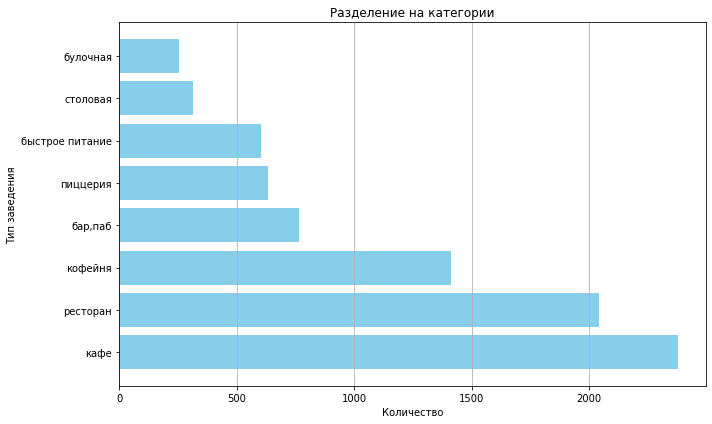

In [23]:
plt.figure(figsize=(10, 6))  
plt.barh(df_category['category'], df_category['count'], color='skyblue') 
plt.xlabel('Количество')  
plt.ylabel('Тип заведения')  
plt.title('Разделение на категории')  
plt.grid(axis='x')
plt.tight_layout()
plt.show() 

- **Вывод:** самый популярный формат общепита в Москве - кафе (**2377 заведения**), на втором месте - ресторан (**2042**), а на третьем - кофейни (**1413**). Далее, с большим отрывом (более чем в два раза) идут остальные заведения: на последних местах оказались булочные (**256**) и столовые (**315**). Стоит отметить, что рестораны и кафе привычные форматы зведений для столицы, а кофейни начали появляться недавно и стали популярными благодаря растущей культуре потребления кофе и модным тенденциям среди молодежи.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [24]:
# District
print('Уникальные значения столбца district:')
print(list(df['district'].unique()))

Уникальные значения столбца district:
['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']


In [25]:
# Создаем таблицу с количеством заведений по районам
df_district = (
    df.groupby('district')['id']  # Группируем по районам
    .count()                      # Считаем количество заведений
    .sort_values(ascending=False) # Сортируем по убыванию
    .reset_index(name='count')    # Сбрасываем индекс и задаем имя столбцу
)

# Добавляем столбец с долей (процент от общего количества)
df_district['prop'] = df_district['count'] / df_district['count'].sum()

# Форматируем долю для красивого вывода (два знака после запятой)
df_district['prop'] = df_district['prop'].round(2)

# Выводим результат
df_district

,district,count,prop
0,Центральный административный округ,2242,0.27
1,Северный административный округ,899,0.11
2,Южный административный округ,892,0.11
3,Северо-Восточный административный округ,890,0.11
4,Западный административный округ,850,0.10
5,Восточный административный округ,798,0.09
6,Юго-Восточный административный округ,714,0.08
7,Юго-Западный административный округ,709,0.08
8,Северо-Западный административный округ,409,0.05


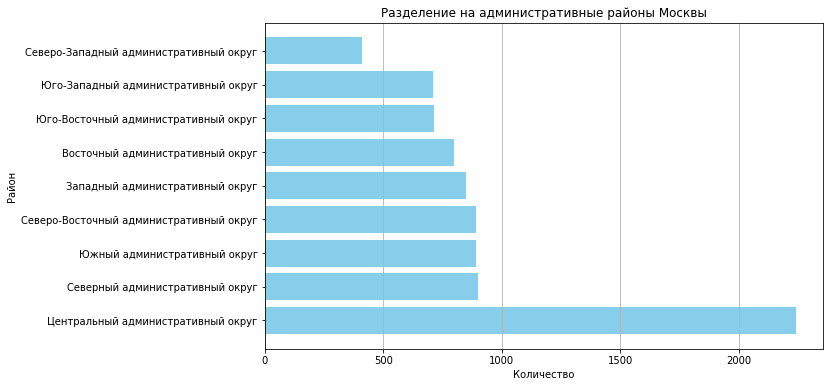

In [26]:
plt.figure(figsize=(10, 6))  # Установите размер фигуры
plt.barh(df_district['district'], df_district['count'], color='skyblue')  # Постройте диаграмму
plt.xlabel('Количество')  # Подпишите ось X
plt.ylabel('Район')  # Подпишите ось Y
plt.title('Разделение на административные районы Москвы')  # Добавьте заголовок
plt.grid(axis = 'x')  # Добавьте сетку по оси X для лучшей читаемости
plt.show()  # Отобразите диаграмму

In [27]:
# Таблица с количеством точек в Центральном административном округе Москвы
df_grouped = df.groupby(['district', 'category'])['id'].count().sort_values(ascending = False).reset_index()
df_district_central = df_grouped.loc[df_grouped['district'] == 'Центральный административный округ']
df_district_central

,district,category,id
0,Центральный административный округ,ресторан,670
1,Центральный административный округ,кафе,464
2,Центральный административный округ,кофейня,428
3,Центральный административный округ,"бар,паб",364
23,Центральный административный округ,пиццерия,113
28,Центральный административный округ,быстрое питание,87
40,Центральный административный округ,столовая,66
50,Центральный административный округ,булочная,50


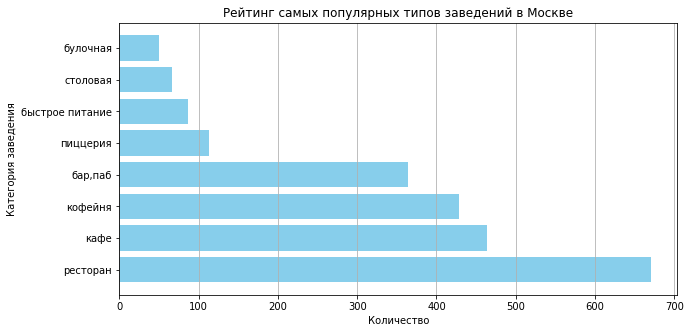

In [28]:
plt.figure(figsize=(10, 5))  
plt.barh(df_district_central['category'], df_district_central['id'], color='skyblue')  
plt.xlabel('Количество')  
plt.ylabel('Категория заведения')  
plt.title('Рейтинг самых популярных типов заведений в Москве')
plt.grid(axis = 'x')  
plt.show() 

- **Вывод:** в центральном а.о. Москвы самое большее количество заведений среди всех а.о. столицы: 2242 заведения, что больше четверти (**27%**) от общего числа заведений общественного питания в Москве. Популярнее всего рестораны (**670**), что может быть связано с "обеспеченностью" района, а также популярностью данных мест у туристов, т.к. для туристы являются потребителями с самым высоким средним чеком. Остальные заведения 

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [29]:
prop_chain = round(df['chain'].sum() / len(df) * 100, 2)
print(f'Доля сетевых заведений составляет {prop_chain}%')

Доля сетевых заведений составляет 38.12%


In [30]:
# Создаём массив данных о доли сетевых и несетевых заведений
df_chain = df.groupby('chain')['id'].count().reset_index()
df_chain

,chain,id
0,0,5200
1,1,3203


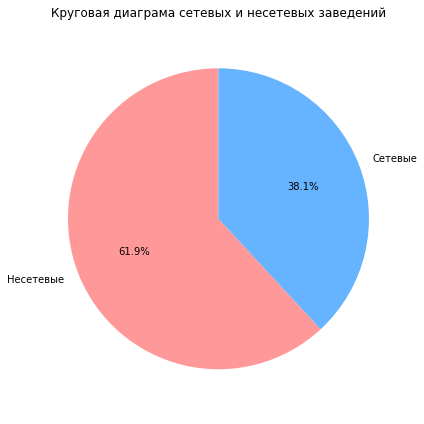

In [31]:
# Настроим название показателей
labels = ['Несетевые', 'Сетевые']

# Настроим пастельные цвета
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(df_chain['id'], labels = labels, autopct = '%1.1f%%', startangle = 90, colors = colors)
plt.axis('equal')
plt.title('Круговая диаграма сетевых и несетевых заведений')
plt.tight_layout()
plt.show()

In [32]:
# Создаём сводную таблицу по сетевым и несетевым по категориям
df_pivot = pd.pivot_table(
    data = df,
    values = 'id',
    index = 'category',         
    columns = 'chain',       
    aggfunc = 'count',       
    fill_value = 0
)

df_pivot

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1598,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


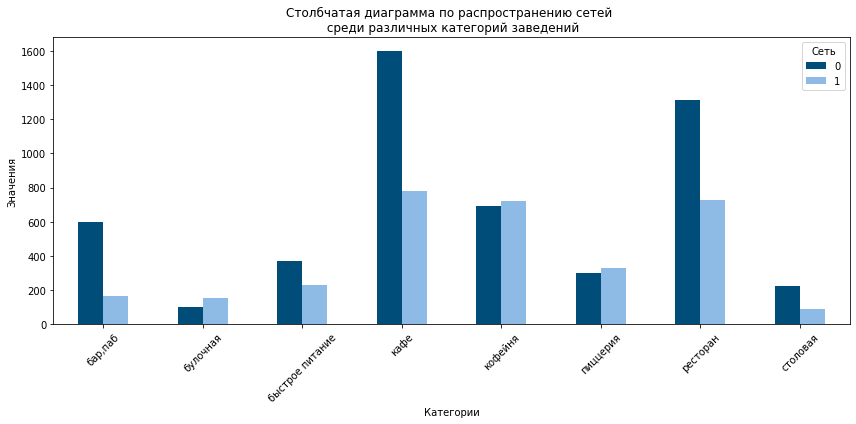

In [33]:
plt.figure(figsize = (12, 6))  

ax = plt.gca()  
df_pivot.plot(kind = 'bar', ax = ax, color = ['#004d7a', '#8ebae6']) 

plt.title('Столбчатая диаграмма по распространению сетей \n среди различных категорий заведений')
plt.xlabel('Категории') 
plt.ylabel('Значения')
plt.legend(title = 'Сеть')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- **Вывод:** сетевая бизнес-модель является самой распространённой для: кофеен, пиццерий и булочных, однако, в остальных категориях заведений она является менее распространённой чем несетевой формат. Такое распределение может быть связано с тем, что пиццерии и кофейни достаточно молодая категория для столицы и сам формат сетевых заведений появился не так давно, поэтому среди данных заведений у них получилось получить наибольшую популярность. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [34]:
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

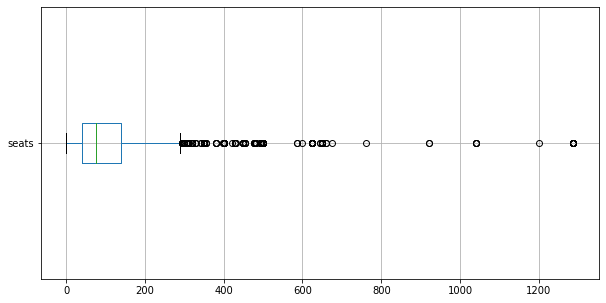

In [35]:
#  Ниже был построен ящик с усамми
df.boxplot(column = 'seats', vert=False)
plt.gcf().set_size_inches(10, 5)

- Как можно видеть, в построеном "ящике с усами" **большое количество выбросов**, поэтому в дальнейшем при оценки среднего значения сидячих мест данными стоит брать не среднее арифмитическое значение, а медианну

In [36]:
# Оцениваем средние значения по медиане
df_seats_category = df.groupby(['category'])['seats'].quantile(0.5).sort_values(ascending=True).reset_index()
df_seats_category

,category,seats
0,булочная,50.0
1,пиццерия,55.0
2,кафе,60.0
3,быстрое питание,65.0
4,столовая,75.5
5,кофейня,80.0
6,"бар,паб",82.0
7,ресторан,86.0


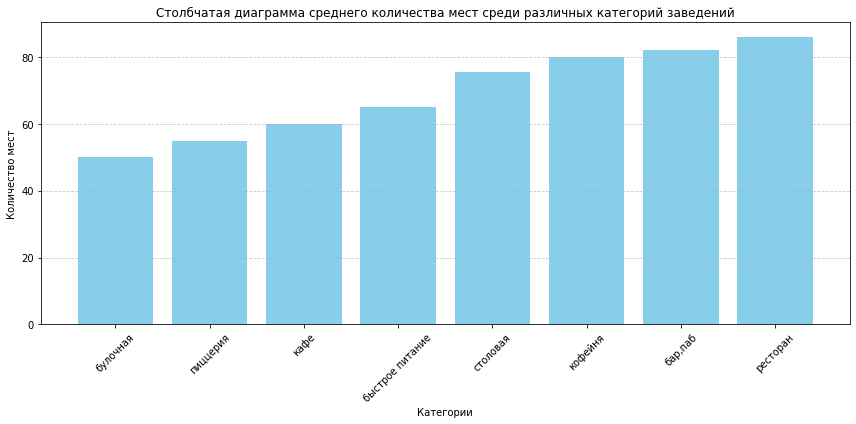

In [37]:
plt.figure(figsize = (12, 6))
plt.bar(df_seats_category['category'], df_seats_category['seats'], color = 'skyblue')
plt.title('Столбчатая диаграмма среднего количества мест среди различных категорий заведений')
plt.xlabel('Категории') 
plt.ylabel('Количество мест')
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Вывод:** как можно видеть, в среднем, самое большое количество сидячих мест в ресторанах (**86 мест**), пабах (**82 места**) и кофейнях (**80 мест**), самое маленькое - в булочных (**50 мест**), что может быть связано с тем, что многие булочные работают по принципу "на вынос". В ресторанах, ожидаемо, самое большое количество мест, что связано с тем, что многие рестораны могут работать как банкетные залы на большое количество мест.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [38]:
# Составляем df с рейтингами (медиана и среднее арифмитическое)
df_rating_category = df.groupby('category')['rating'].mean().sort_values(ascending=True).reset_index()
df_rating_category

,category,rating
0,быстрое питание,4.050249
1,кафе,4.123896
2,столовая,4.211429
3,булочная,4.268359
4,кофейня,4.277282
5,ресторан,4.290402
6,пиццерия,4.301264
7,"бар,паб",4.387696


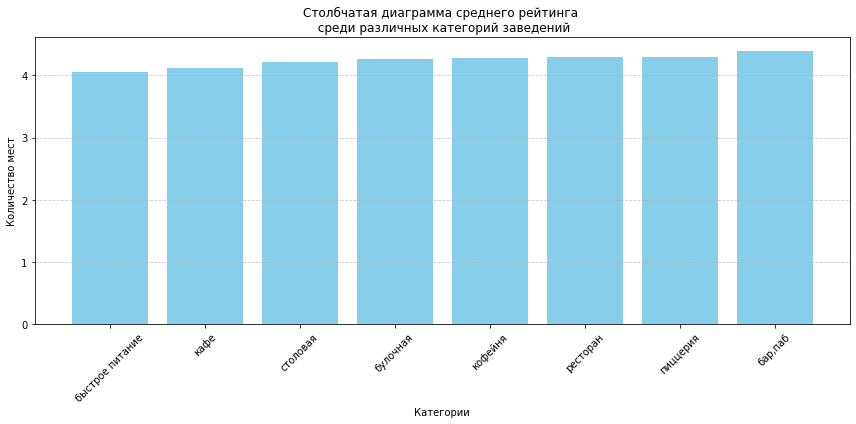

In [39]:
plt.figure(figsize = (12, 6))
plt.bar(df_rating_category['category'], df_rating_category['rating'], color = 'skyblue')
plt.title('Столбчатая диаграмма среднего рейтинга \n среди различных категорий заведений')
plt.xlabel('Категории') 
plt.ylabel('Количество мест')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- **Вывод:** Как можно видеть, усреднённые оценки по категориям не сильно различаются, но при этом можно отметить, что наименьший рейтинг имеют заведения быстрого питания (**4,05 из 5**) и кафе (**4,12**), а самый высокий: пицерии (**4,3**) и пабы (**4,38**). Можно предположить, что заведения быстрого питяния, столовые, а также многие кафе получили низкие оценки из-за недостатка клиентского сервиса, потому что в быстром питании и столовых он вообще не предусмотрен. 

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [40]:
df['rating'].unique()
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
is_24_7                 bool
dtype: object

interval columns not set, guessing: ['chain', 'seats', 'middle_avg_bill', 'rating']


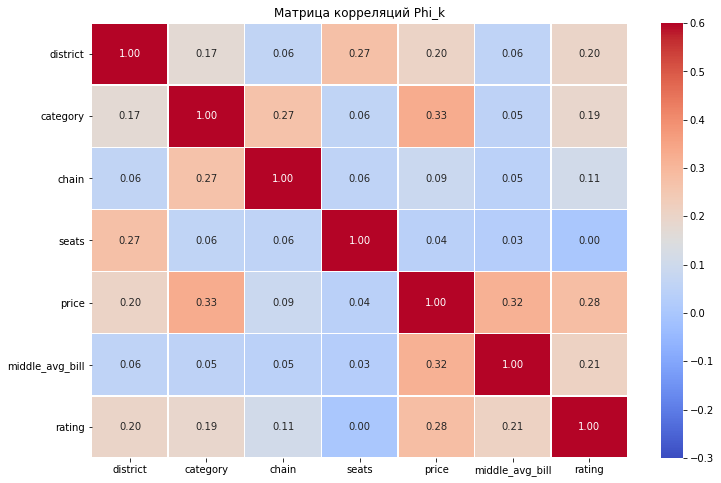

In [41]:
# Заполнение пропусков
df['price'].fillna('Unknown', inplace=True)
df.groupby('category')['middle_avg_bill'].transform(
    lambda x: x.fillna(x.median())
)
df['seats'].fillna(df['seats'].median(), inplace=True)

# Выбираем нужные столбцы
target_columns = [
    'district', 'category', 'chain', 'seats', 
    'price', 'middle_avg_bill', 'rating'
]
df_sub = df[target_columns]

# Рассчитываем матрицу корреляций
corr_matrix = df_sub.phik_matrix()

# Тепловая карта для выбранных столбцов
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-0.3, vmax=0.6,
    linewidths=0.5
)

plt.title('Матрица корреляций Phi_k')
plt.show()

<AxesSubplot:>

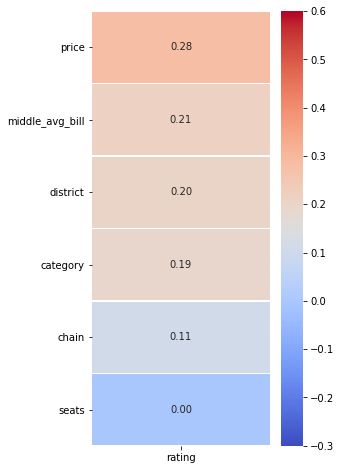

In [42]:
corr_matrix_rating = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

plt.figure(figsize=(4, 8))

sns.heatmap(
    corr_matrix_rating,
    annot = True, 
    fmt = ".2f", 
    cmap = 'coolwarm', 
    vmin = -0.3, vmax=0.6,
    linewidths = 0.5
)

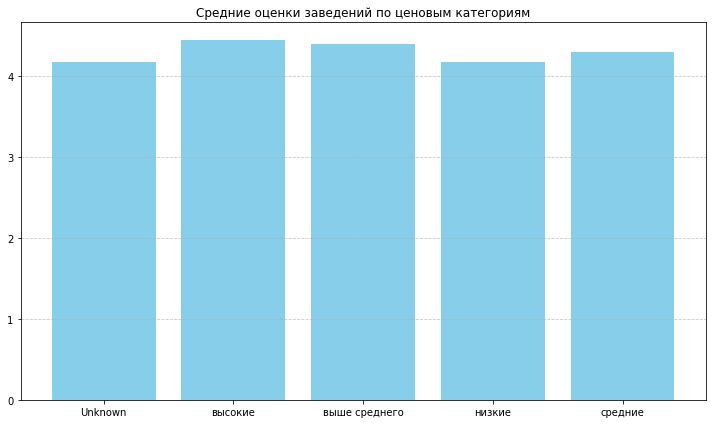

In [43]:
plt.figure(figsize=(10, 6))

df_price = df.groupby('price')['rating'].mean().reset_index()

plt.bar(df_price['price'], df_price['rating'], color = 'skyblue')

plt.title('Средние оценки заведений по ценовым категориям')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

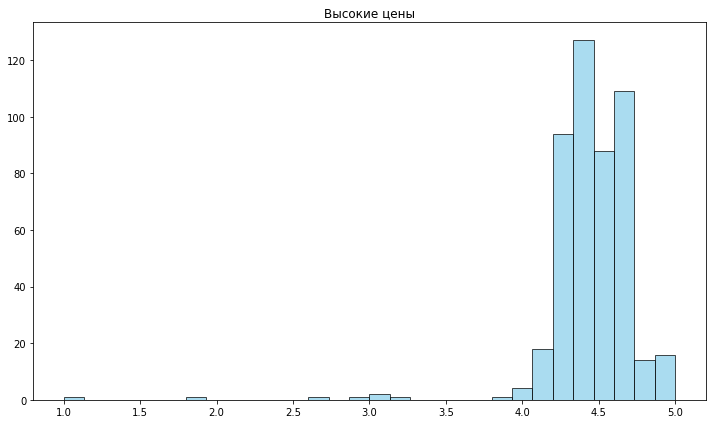

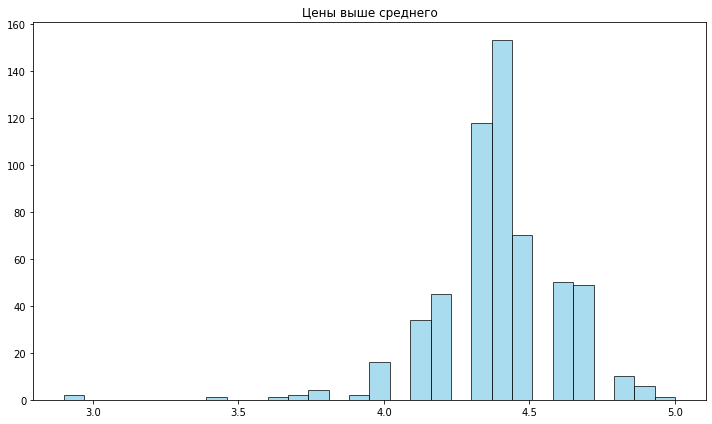

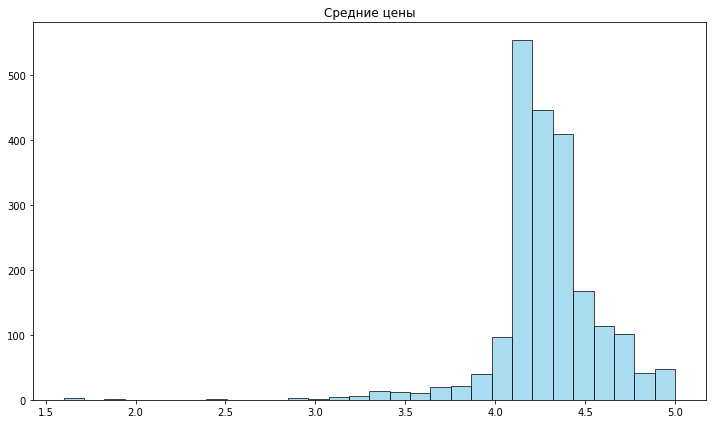

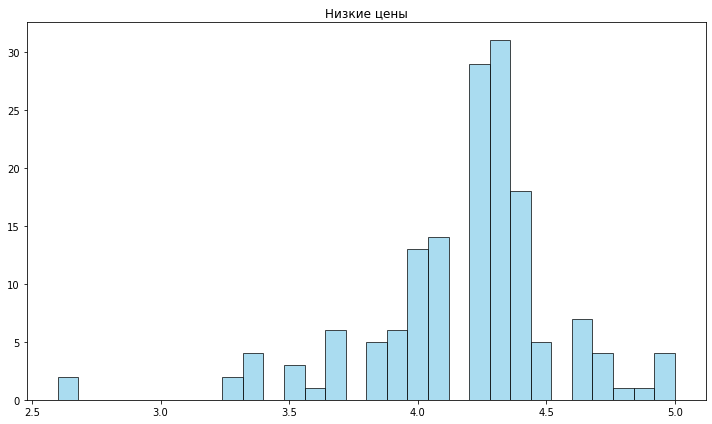

In [44]:
# Потсроим нескоьлко гистограм, чтобы оценить распределения для заведений разных ценовых диапазонов

# высокие
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['price'] == 'высокие', 'rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Высокие цены')
plt.tight_layout()
plt.show()

# выше среднего
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['price'] == 'выше среднего', 'rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Цены выше среднего')
plt.tight_layout()
plt.show()

# средние
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['price'] == 'средние', 'rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Средние цены')
plt.tight_layout()
plt.show()

# низкие
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['price'] == 'низкие', 'rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Низкие цены')
plt.tight_layout()
plt.show()

- Как можно заметить на гистограмах, у зведений с более низкими ценовыми диапазонами распределение имеет маленький левый "хвост", однако, чем более дорогоо заведение, тем более распределение смещено вправо. Это также подтвержает столбчатая диаграма. которая отражает среднее арифмитическое значение по каждой категории. 

- **Вывод:** заведения с высокими ценами, как правило, получают лучшие оценки относительно конкурентов с из более низких ценовых категорий. Тому может быть несколько причин:
1. Заведения с высокими ценами предоставляют лучший сервис, что оставляет положительное впечатление;
2. Более высокие цены привлекают более финансово обеспеченных людей, которые склонны реже оставлять негативные отзывы;
3. В заведениях с низкими ценами могут чаще происходить случаи отравления из-за экономии на продуктах;
4. Сами работники организаций могут оставлять отзывы, поэтому можно предположить, что в более "дорогих" заведениях, работники в большей мере удовлетворены уровнем своей з/п и рабочими условиями. 

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [45]:
# Фильтруем данные
df_only_chain = df.loc[df['chain'] != 0]

# Группируем отфильтрованные данные и получаем топ-15
df_chain_popular = df_only_chain.groupby('name')['id'].count().sort_values(ascending = False).reset_index().head(15)

# Считаем рейтинг для всех 
df_chain_rating = df_only_chain.groupby('name')['rating'].mean().sort_values(ascending = False).reset_index()

# Объеденим полученые df и добавляем фильтрацию для заведений с одинаковым количеством заведений в Москве
df_top = df_chain_popular.merge(df_chain_rating, on = 'name').sort_values(by=['id', 'rating'], ascending = False)

# Выведем
df_top

,name,id,rating
0,шоколадница,120,4.177500
1,домино'с пицца,76,4.169737
2,додо пицца,74,4.286486
3,one price coffee,71,4.064789
4,яндекс лавка,69,3.872464
5,cofix,65,4.075385
6,prime,50,4.116000
7,хинкальная,44,4.322727
8,кофепорт,42,4.147619
9,кулинарная лавка братьев караваевых,39,4.394872


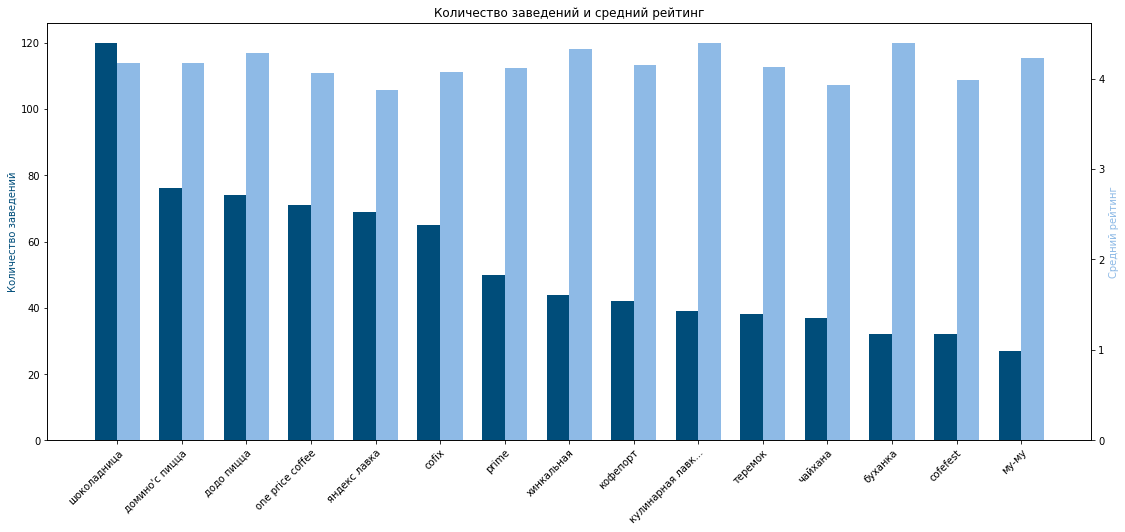

In [46]:
width = 0.35
x = range(len(df_top))

fig, axis1 = plt.subplots(figsize=(20, 10))

# Основной график
axis1.bar(x, df_top['id'], width=width, color='#004d7a')
axis1.set_ylabel('Количество заведений', color='#004d7a')

# Вторичная ось
axis2 = axis1.twinx()
axis2.bar([i + width for i in x], df_top['rating'], width=width, color='#8ebae6')
axis2.set_ylabel('Средний рейтинг', color='#8ebae6')

# Обработка и поворот меток
labels = [str(label) for label in df_top['name']]  # Преобразование в строки
labels = [label[:15] + '...' if len(label) > 18 else label for label in labels]  # Сокращение

axis1.set_xticks([i + width / 2 for i in x])
axis1.set_xticklabels(
    labels,
    rotation=45,
    ha='right',
    fontsize=10,  # Уменьшение размера шрифта
    rotation_mode='anchor'
)

# Настройка отступов
plt.subplots_adjust(
    bottom=0.3,   # Увеличение нижнего отступа
    right=0.85    # Освобождение места для второй оси
)

plt.title('Количество заведений и средний рейтинг')
plt.show()

In [47]:
# Теперь определим категории заведений
unique_combinations = df[['name', 'category']].drop_duplicates()
df_top.merge(unique_combinations, on = 'name', how = 'inner')

,name,id,rating,category
0,шоколадница,120,4.177500,кофейня
1,шоколадница,120,4.177500,кафе
2,домино'с пицца,76,4.169737,пиццерия
3,додо пицца,74,4.286486,пиццерия
4,one price coffee,71,4.064789,кофейня
5,яндекс лавка,69,3.872464,ресторан
6,cofix,65,4.075385,кофейня
7,prime,50,4.116000,ресторан
8,prime,50,4.116000,кафе
9,хинкальная,44,4.322727,быстрое питание


- **Вывод:** Саымыми популярными сетевыми заведениям в Москве являются: Шоколадница (**120**), за которой с большим отрывом идут домино'с пицца (**76**), До-до Пиццаы (**74**), а также кофейни, преимущественно расположенные возле вокзалов и станций метро, Cofix и OnePriceCoffee. Также хотелось бы отметить, что многие кофейни сочетают сразу несколько форматов. Например, Шоколадница представлена одновременно и как кофейня и как кофе, та Му-му представлена сразу в 7 форматах.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [48]:
# Группировка по районам и рименение describпe к среднему чеку
df_pric_district = df.groupby('district')['middle_avg_bill'].describe().sort_values(by = 'mean', ascending = False)
df_pric_district

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Центральный административный округ,1060.0,1191.057547,920.014707,0.0,500.00,1000.0,1500.0,7250.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0


In [49]:
df_pric_district = df_pric_district.reset_index()

# Укоротим названия для лаконичности без потери смысла
for district in df_pric_district['district']: 
    n_district = district.split()[0] + ' а.о.'
    df_pric_district.loc[df_pric_district['district'] == district, 'district'] = n_district

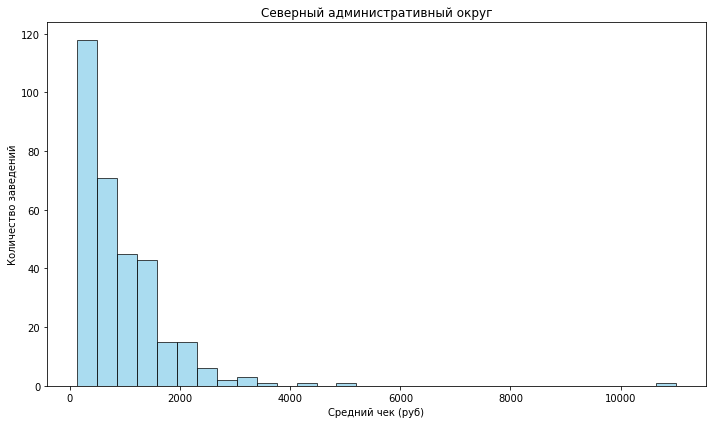

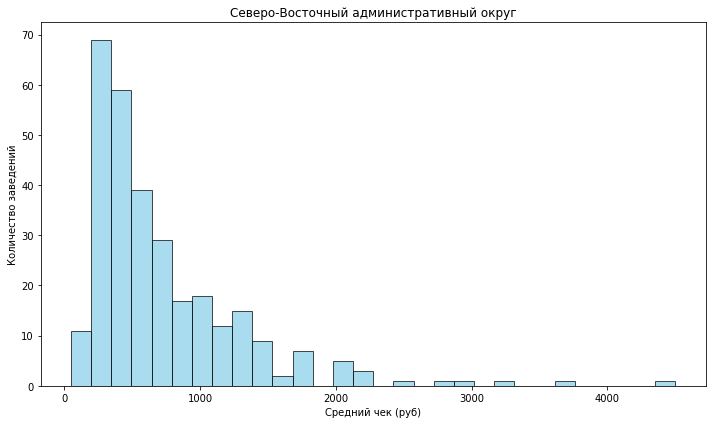

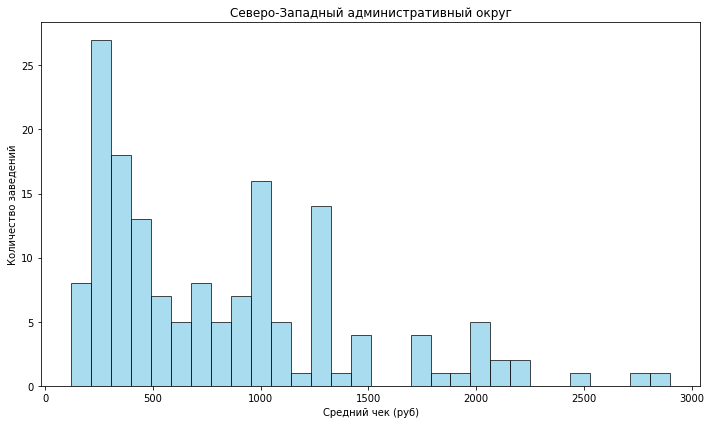

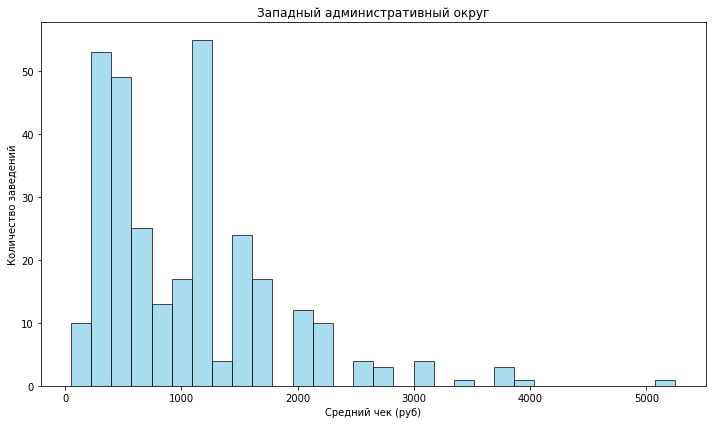

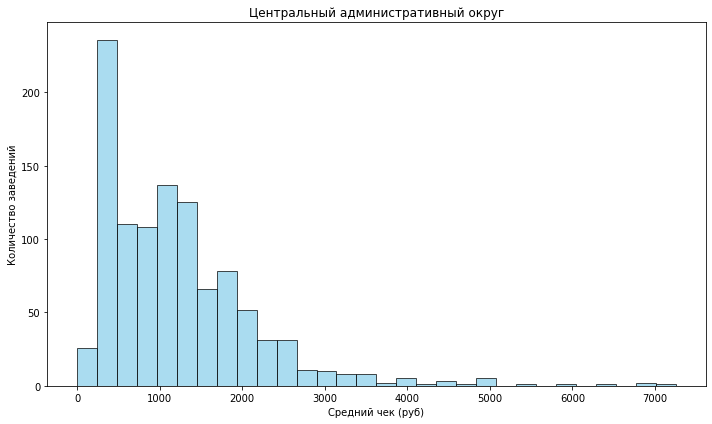

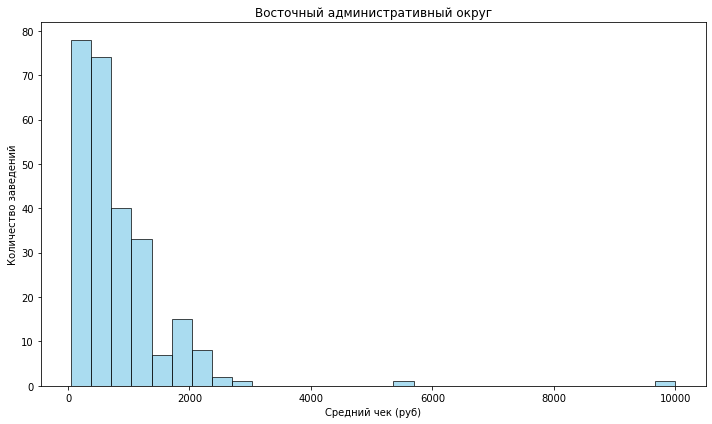

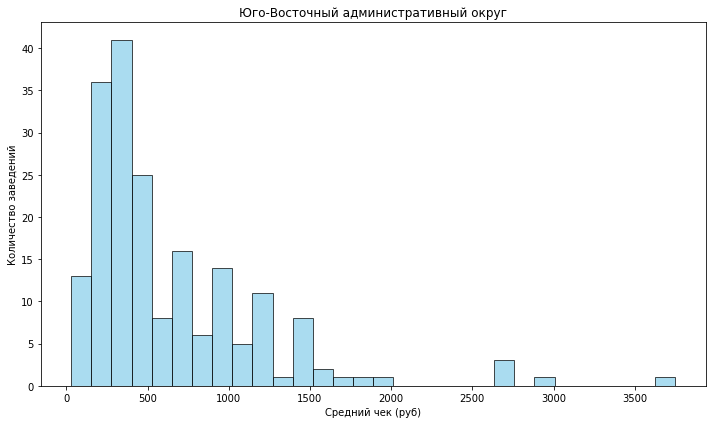

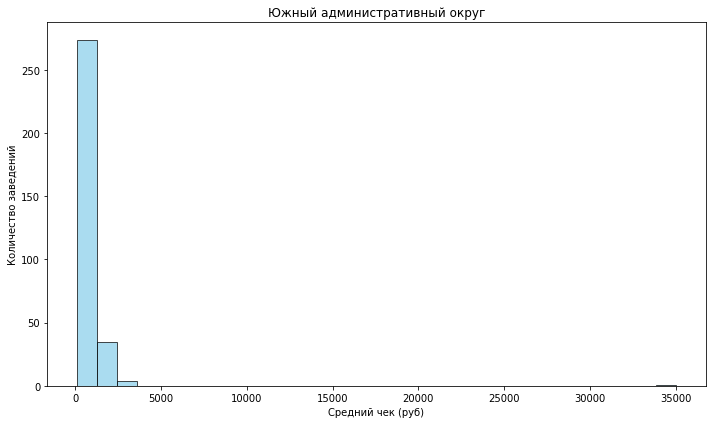

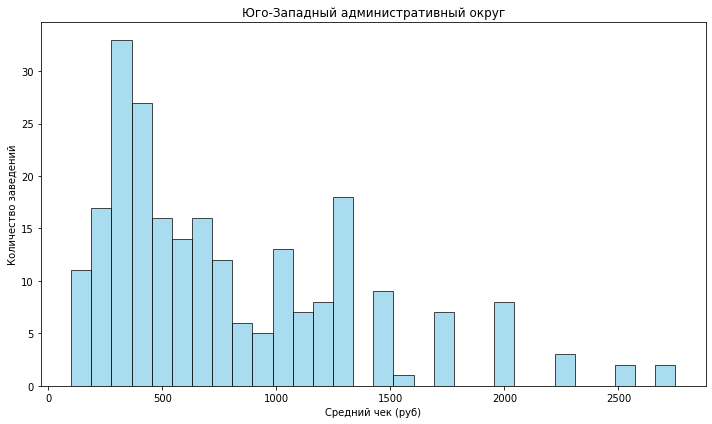

In [50]:
# Предположим, что df_pric_district - это список районов
districts_list = list(df['district'].unique())

for district in districts_list:
    # Фильтруем данные по текущему району
    district_data = df.loc[df['district'] == district, 'middle_avg_bill']
    
    # Проверяем, есть ли данные для этого района
    plt.figure(figsize=(10, 6))
    plt.hist(district_data, 
             bins=30, 
             color='skyblue', 
             edgecolor='black', 
             alpha=0.7)
    plt.title(district)
    plt.xlabel('Средний чек (руб)')
    plt.ylabel('Количество заведений')
    plt.tight_layout()
    plt.show()

<div class="alert alert-block alert-info">
Построил гистаграммы для каждого района.
</div>

No handles with labels found to put in legend.


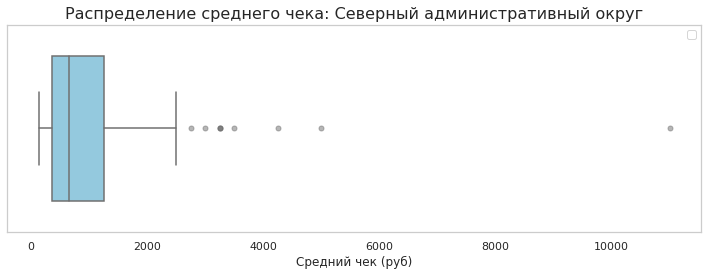

No handles with labels found to put in legend.


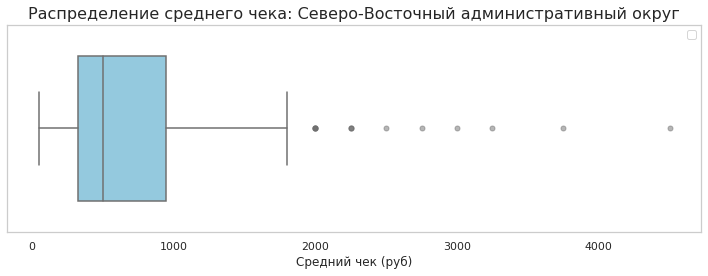

No handles with labels found to put in legend.


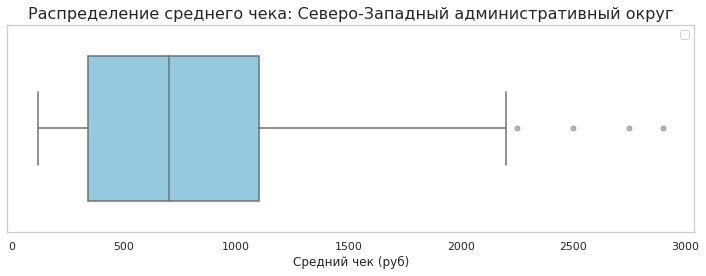

No handles with labels found to put in legend.


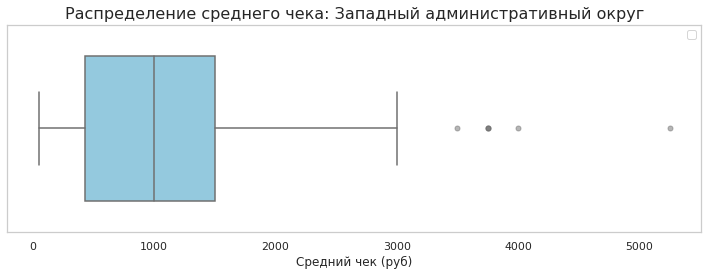

No handles with labels found to put in legend.


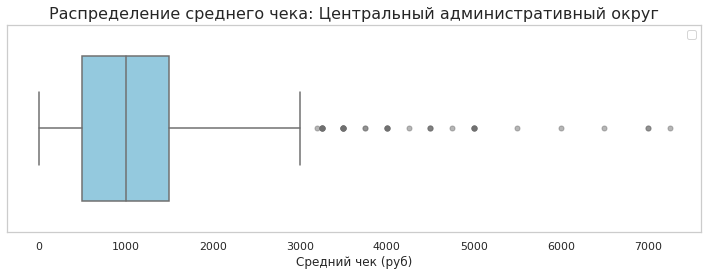

No handles with labels found to put in legend.


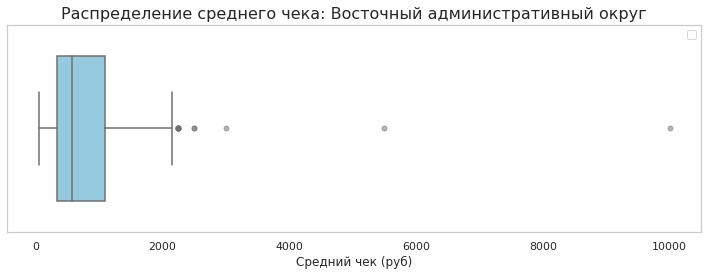

No handles with labels found to put in legend.


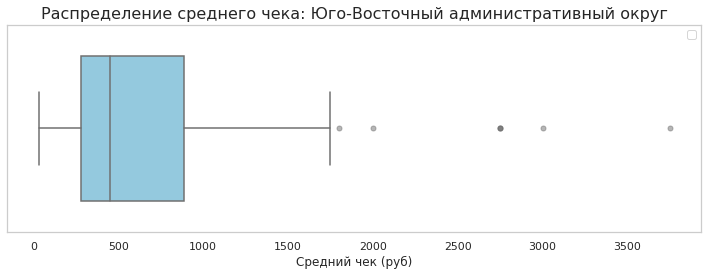

No handles with labels found to put in legend.


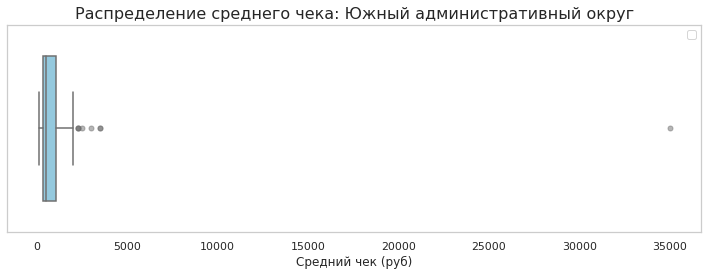

No handles with labels found to put in legend.


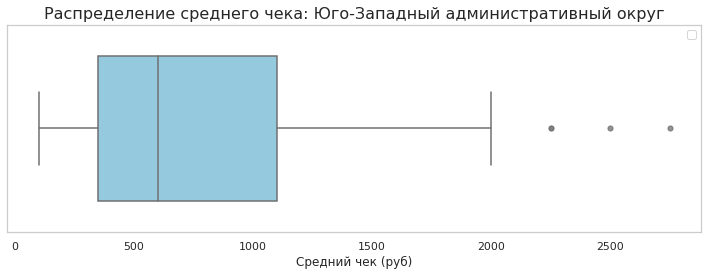

In [51]:
# Создаем список уникальных районов
districts_list = list(df['district'].unique())

# Настройка стиля графиков
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Строим ящики с усами для каждого района
for district in districts_list:
    # Фильтруем данные по текущему району
    district_data = df.loc[df['district'] == district, 'middle_avg_bill']
        
    # Создаем фигуру
    plt.figure(figsize=(10, 4))
    
    # Строим ящик с усами
    sns.boxplot(
        x=district_data,
        orient='h',  # Горизонтальная ориентация
        width=0.7,
        color='skyblue',
        flierprops=dict(marker='o', markersize=5, alpha=0.5)  # Настройки выбросов
    )
    
    # Настройка оформления
    plt.title(f'Распределение среднего чека: {district}', fontsize=16)
    plt.xlabel('Средний чек (руб)', fontsize=12)
    plt.ylabel('')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    
    
    plt.tight_layout()
    plt.show()

- **Вывод:** как можно видеть, во всех а.о. наблюдается распределение с сильновыраженной правосторонней кривизной, однако, в Центральном а.о. (**1191 рублей**) наблюдается самое болшое количество выбросов, что может оказывать существенное влияение на значение среднего чека в округе, второе и третье место по размеру среднего чека занимают Западный (**1053 рублей**) и Северные (**927 рублей**) а.о. В Южном а.о. Так жо хотелось бы отметить, что из-за маленькой выборки заведений и наличия выбросов сформировалось самое большое значение средниквадратичного отклонения - **2008 рублей**, что может говорить о необходиости почистить данные от выбросов.

## Итоговый вывод и рекомендации

### Общий обзор проделанной работы

- В ходе исследования проанализировали данные *более 8 тыс. заведений общественного питания в Москве*. Данные включали общую информацию о заведениях общепита и статистику цен в ресторанах, барах, кофейнях и пр. Обсновной целью исследования было определение самых привлекательных форматов заведения для открытия. Среди рассматриваемых харакетиристик были: типу, графику, административному району, рейтингу, количеству посадочных мест, бизнес-модели (*сетевые и несетевые*), ценовым характеристикам.

### Оветы на исследовательские вопросы

- Исследовательский анализ данных позволил построить следующую "карту" рынка заведенрий общественного питания в Москве: 
    - Самыми популярными категориями заведений являются: кафе (**2378**), ресторан (**2043**), кофейня (**1413**) и с сильными  отставанием бары и пабы (**745**);
    - Больше всего заведений общепита в Москве в центральном а.о. (**2242**) и с сильным отставанием - Северный а.о. (**900**) и Южный а.о. (**892**). В Центральном а.о. популярнее всего рестораны (**670**);
    - Несетевых заведений в столице больше чем сетевых: **61.9% против 38.1%**. Сетевые заведения превышают количество точек только среди кофеен, булочных и пиццерий, в остальных категориях, у несетевых заведений больше открытых  точек;
    - Наибольшее количество сидячих мест есть в ресторанах и паба: в среднем, **более 100 сидячих мест**;
    - Для боьшинства категорий средний рейтинг держдится в диапазоне от 4,2 до 4,4 звёзд, однако, у заведений бьыстрого питания (**4,05**) и кафе (**4,12**) он находится на самом низком уровне;
    - **Рейтинг заведений в большей мере зависит от стоимости заведения**: чем выше стомость заведения, тем, в среднем, при прочих равных фаткорах будет выше рейтинг;
    - Самыми популярными сетевыми заведениями в москве являются "Шоколадница", "Домино'с пицца" и "ДоДо Пицца", однако, у данных заведений реализован не один формат заведений (*category*), а сразу несколько, что позволяет в большей мере охватить рынок; 
    - Чек выше среднего по Москве в Центральном а.о. (**1191 рублей**), Западном а.о. (**1053**), Северном а.о. (**927**), в остальных а.о. средний чек не превышает среднего показателя по Москве. 

### Рекомендации на основе анализа данных

**1 Враиант: Заказчик не рассматривает для себя варианта работы по франшизе**
1. *Территория:* мы рекомендуем **не рассматривать Центральный а.о.**, где наблюдается самый высокий уровень конкуренции, а обратить внимание на другие а.о.;
2. *Категория заведения:* если в дальнейшем компания-заказчик рассматривает для себя создание своей сети заведений общественного питания, то мы рекомендуем выбрать  формат кофеен, пицерий или булочных, где данная бизнес-модель показала свою эффективность, в альтернативном случае, можно рассматривать другие форматы заведений;  
3. *Ценовая категория:* следует выбирать ценовую категорию **не ниже средней**, в среднюю стоимость чека включать развитие клиентского сервиса, чтобы улучшить репутацию и получить рейтинг выше чем у конкурентов;
4. *Бизнес-модель:* рассматривать отдельные БМ стоит уже отталкиваясь от конкретного района, который больше всего будет интересовать заказчика.